## Series class

In [1]:
import pandas as pd
series = pd.Series(["하나", "둘", "셋", "넷", "다섯",
                   "여섯", "일곱", "여덟", "아홉", "열"],
                    index =[i for i in range(1, 11)])
series

1     하나
2      둘
3      셋
4      넷
5     다섯
6     여섯
7     일곱
8     여덟
9     아홉
10     열
dtype: object

object : 최상위에 있는 객체라고 생각하면 됩니다.

Series는 Value와 Index를 갖습니다.

### Series 생성하기

In [2]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
             index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

index와 values로 각각 인덱스와 값에 접근할 수 있습니다.

In [3]:
s.index 

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [4]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

name 속성을 이용해서 이름을 붙일 수 있습니다.

In [5]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### dict 이용

In [6]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [7]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d, index=['x', 'y', 'z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

NaN 값이 float 자료형에서만 표현 가능하므로 결과가 float 자료형이 된 것에 주목합시다.
이렇듯 어떤 오류로 인해 NaN값으로 바뀌게 되면 데이터형이 바뀐다... 생각해봅시다.

In [8]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d)       # 인덱스 키워드 인자를 생략하면 그대로 만들어냅니다.
ser

a    1
b    2
c    3
dtype: int64

### Series index를 속성처럼 활용하기

In [9]:
ser.a, ser.b, ser.c

(1, 2, 3)

### Series의 특징
Series 객체는 index label을 키(key)로 사용하기에 딕셔너리 자료형과 비슷한 특징을 갖는다.

In [10]:
"서울" in s

True

In [11]:
9_904_312 in s # in 으로 물어볼 땐 키워드 인자로 물어본다.. values 값들을 확인하는 코드로 확인한 후 어떻게 물어야할지 감을 잡아보자

False

In [12]:
for k, v in s.items():
    print(f"{k}, {v}")

서울, 9904312
부산, 3448737
인천, 2890451
대구, 2466052


### Series 연산하기
넘파이 배열처럼 Series도 벡터화 연산을 할 수 있습니다. 다만 연산은 Series의   
value에만 적용되며 index 값은 변하지 않습니다.  
예를 들어 인구 숫자를 백만 단위로 만들기 위해 Series 객체를 1,000,000 으로  
나누어도 index label에는 영향을 미치지 않는 것을 볼 수 있습니다.  

In [13]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

### Series 인덱싱
Series는 넘파이 배열에서 가능한 index 방법 이외에도 index label을 이용한 인덱싱도 할 수 있다.  
배열 인덱싱이나 index label을 이용한 슬라이싱(slicing)도 가능하다.  

In [14]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [15]:
s[1], s['부산']

(3448737, 3448737)

In [16]:
s[3], s['대구']

(2466052, 2466052)

#### 배열 인덱싱

In [17]:
s[[0, 3, 1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [18]:
s[['서울', '대구', '부산']]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

### Series 슬라이싱

In [19]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [20]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [21]:
s["서울":"대구"]

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### Series index 기반 연산

In [22]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [23]:
s2 = pd.Series({"서울": 9631484, "부산": 3393191, "인천":2632035, "대전":1490158})
s2

서울    9631484
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [24]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272828.0
인천    258416.0
dtype: float64

### Series에서 값이 NaN인지 확인

In [25]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

### Series에서 NaN이 아닌 값 구하기

In [26]:
ds[ds.notnull()]

부산     55546.0
서울    272828.0
인천    258416.0
dtype: float64

### Series 데이터 추가, 갱신, 삭제

In [27]:
rs = pd.Series([1.63323, 2.832690, 9.8181077],
             index=["부산", "서울", "인천"])

In [28]:
rs["부산"] = 1.63
rs

부산    1.630000
서울    2.832690
인천    9.818108
dtype: float64

In [29]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818108
대구    1.410000
dtype: float64

In [30]:
del rs["서울"]
rs

부산    1.630000
인천    9.818108
대구    1.410000
dtype: float64

#### 연습 문제
아래 fin1과 fin2_value, fin2_index를 활용하여 Series 객체 ser_finance1, ser_finance2를 만들어보세요.   


In [31]:
fin1 = {"카카오":60010, "삼성전자":61000, "LG전자":90000}
fin2_value = [60200, 61200, 200100]
fin2_index = ["카카오", "삼성전자", "네이버"]

In [32]:
ser_finance1 = pd.Series(data=fin1)
ser_finance2 = pd.Series(data=fin2_value, index=fin2_index)
print(ser_finance1)
print(ser_finance2)

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64
카카오      60200
삼성전자     61200
네이버     200100
dtype: int64


#### 연습 문제
앞서 만든 두 Series 객체를 활용하여 사칙 연산을 각각 수행해보세요. 사칙연산 중 NaN 값을 갖는 항목과 dtype을 각각 확인해보세요. 왜 해당 dtype이 나오는지 설명하세요.  

In [33]:
ser_finance1 - ser_finance2 # NaN 값으로 인해 float형

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [34]:
ser_finance1 + ser_finance2 # 위와 동일

LG전자         NaN
네이버          NaN
삼성전자    122200.0
카카오     120210.0
dtype: float64

In [35]:
ser_finance1 * ser_finance2 # 위와 동일

LG전자             NaN
네이버              NaN
삼성전자    3.733200e+09
카카오     3.612602e+09
dtype: float64

In [36]:
ser_finance1 / ser_finance2 # 다른 결과값도 float형

LG전자         NaN
네이버          NaN
삼성전자    0.996732
카카오     0.996844
dtype: float64

#### 연습 문제
아래의 연산 결과 중 NaN 값이 없게 Series 객체를 출력해보세요.

In [37]:
result = ser_finance1 - ser_finance2
result[result.notnull()]

삼성전자   -200.0
카카오    -190.0
dtype: float64

## DataFrame class
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

### DataFrame 생성

In [38]:
d = {'col1': [1,2], 'col2':[3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [39]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [40]:
df.dtypes

지역                object
2015               int64
2010               int64
2005               int64
2000               int64
2010-2015 증가율    float64
dtype: object

### DataFrame의 속성 values, columns, index

In [41]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [42]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [43]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

### DataFrame 이름 붙이기

In [44]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


#### 연습 문제
지금부터 인터넷 서핑을 통해 자신이 관심있는 데이터를 얻고, 아래 조건을 만족하는 
DataFrame을 직접 만들어보세요.

In [45]:
data = {
    "1월": [1, 21, 22, 23, 24],
    "3월": [1,None,None,None,None],
    "5월": [5, 27,None,None,None],
    "6월": [6,None,None,None,None]}
index = [i for i in range(1,6)]
holiday = pd.DataFrame(data, index=index)
holiday.name = "데이터엔지니어링20기_연휴"
holiday.columns.name = "월"
holiday.index.name = "연휴날 수"
holiday

월,1월,3월,5월,6월
연휴날 수,,,,
1,1,1.0,5.0,6.0
2,21,NaN,27.0,NaN
3,22,NaN,NaN,NaN
4,23,NaN,NaN,NaN
5,24,NaN,NaN,NaN


### DataFrame 전치(Transpose)

In [46]:
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [47]:
df.T

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


### DataFrame column 추가, 갱신, 삭제

In [48]:
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [49]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)  # round(2) 2째 자리까지 표기되도록 반올림
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [50]:
del df["2010-2015 증가율"] 
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### DataFrame column 인덱싱

In [51]:
df["지역"]

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [52]:
df["2010"]

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [53]:
type(df["2010"])

pandas.core.series.Series

In [54]:
df[["2010", "2015"]]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [55]:
df[["2010"]]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [56]:
import numpy as np

In [57]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [58]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [59]:
df2[[1, 2]]

,1,2
0,1,2
1,5,6
2,9,10


### DataFrame row 슬라이싱


In [60]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [61]:
df[:1]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [62]:
df[:"서울"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [63]:
df["부산":"부산"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


### DataFrame row 인덱싱할 경우
KeyError가 발생합니다.

In [64]:
df["서울"]

KeyError: '서울'

### DataFrame 개별 데이터 인덱싱

In [65]:
df["2015"]["서울"]

9904312

In [66]:
type(df["2015"]["서울"])

numpy.int64

#### DataFrame 개별 데이터 인덱싱, 역순으로

In [67]:
df["서울":"서울"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [68]:
df["서울":"서울"]["2015"]

도시
서울    9904312
Name: 2015, dtype: int64

In [69]:
 type(df["서울":"서울"]["2015"])

pandas.core.series.Series

#### 연습 문제
다음 DataFrame을 활용하여 아래 문제를 해결해보세요.
1. 모든 학생의 수학 점수를 Series로 나타낸다.
2. 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.
3. 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
4. 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.
5. 춘향의 점수를 DataFrame으로 나타낸다.
6. 향단의 점수를 Series로 나타낸다.

In [70]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [71]:
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [72]:
math_scores = pd.Series(data["수학"], index)
print(math_scores)
print(df.loc[:,'국어':'영어'])
df["국어 평균"] = sum(df["국어"]) / 4
df["영어 평균"] = sum(df["영어"]) / 4
print(df)
df.loc["향단","영어"] = 80
df["영어 평균"] = sum(df["영어"]) / 4
print(df)
hyang_scores = pd.Series(df.loc["향단"])
print(hyang_scores)

춘향    90
몽룡    60
향단    80
방자    70
dtype: int64
    국어  영어
춘향  80  90
몽룡  90  70
향단  70  60
방자  30  40
    국어  영어  수학  국어 평균  영어 평균
춘향  80  90  90   67.5   65.0
몽룡  90  70  60   67.5   65.0
향단  70  60  80   67.5   65.0
방자  30  40  70   67.5   65.0
    국어  영어  수학  국어 평균  영어 평균
춘향  80  90  90   67.5   70.0
몽룡  90  70  60   67.5   70.0
향단  70  80  80   67.5   70.0
방자  30  40  70   67.5   70.0
국어       70.0
영어       80.0
수학       80.0
국어 평균    67.5
영어 평균    70.0
Name: 향단, dtype: float64


In [73]:
df["평균"] = round((df["국어"]+df["영어"]+df["수학"])/3, 2)
df

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,40,70,67.5,70.0,46.67


In [74]:
# (1) 모든 학생의 수학 점수를 Series로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [75]:
# (2) 모든 학생의 국어와 영어 점수를 DataFrame으로 나타낸다.
df[['국어', '영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,80
방자,30,40


In [76]:
# (3) 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
df['평균'] = round((df['국어'] + df['영어'] + df['수학']) / 3, 2)
# round(df.mean(axis=1), 2)을 활용해도 된다.
df

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,40,70,67.5,70.0,46.67


In [77]:
# (4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.
df['영어']['방자'] = 80
# df.loc['방자', '영어'] = 80
df['평균'] = round((df['국어'] + df['영어'] + df['수학']) / 3, 2)
# round(df.mean(axis=1), 2)을 활용해도 된다.
df

C:\Users\PlayData\AppData\Local\Temp\ipykernel_10616\3282087422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['영어']['방자'] = 80


,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,80,70,67.5,70.0,60.00


In [78]:
# (5) 춘향의 점수를 DataFrame으로 나타낸다.
df[:1]
# df["춘향":"춘향"]

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67


In [79]:
# (6) 향단의 점수를 Series로 나타낸다.
df.T["향단"]

국어       70.00
영어       80.00
수학       80.00
국어 평균    67.50
영어 평균    70.00
평균       76.67
Name: 향단, dtype: float64

#### 연습 문제
다음 DataFrame을 만들어보세요.
- 랜덤 시드는 0입니다.
- values는 넘파이 서브 패키지 중 random의 randn() 메서드를 사용하세요.
- pd.date_range(“20130206”, periods=날짜수)을 활용하세요.
![image](https://user-images.githubusercontent.com/105477856/217556370-f21df1ca-830a-4506-8def-24cfccebc95a.png)

In [80]:
import numpy as np

np.random.seed(0)
values = np.random.randn(6, 4)
columns = ['A', 'B', 'C', 'D']
df = pd.DataFrame(data=values, index=pd.date_range("20130206", periods=6), columns=columns) # columns=list("ABCD")

In [81]:
df

,A,B,C,D
2013-02-06,1.764052,0.400157,0.978738,2.240893
2013-02-07,1.867558,-0.977278,0.950088,-0.151357
2013-02-08,-0.103219,0.410599,0.144044,1.454274
2013-02-09,0.761038,0.121675,0.443863,0.333674
2013-02-10,1.494079,-0.205158,0.313068,-0.854096
2013-02-11,-2.552990,0.653619,0.864436,-0.742165


In [82]:
# 다른 풀이
np.random.seed(0)
dates = pd.date_range("2013-02-26", periods=6)
print(dates)
df3 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df3

DatetimeIndex(['2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01',
               '2013-03-02', '2013-03-03'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165


#### 연습 문제
팀(Team) 객체를 생성할 수 있는 클래스를 만들어보세요.  

In [83]:
class Team:
    count = 0
    order = []
    def __init__(self, number):
        self.number = number
        self.__member = set()
        Team.count += 1
    def add_member(self, name):
        self.name = name
        if self.name in self.__member:
            return print(f"{self.name}님은 이미 팀에 있습니다.")
        else:
            print(f"{self.name}님을 팀에 추가했습니다.")
            self.__member.add(self.name)
    def rm_member(self, name):
        if self.name in self.__member:
            self.__member.remove(self.name)
            print(f"{self.name}님을 {self.number} 팀에서 삭제했습니다.")
        else:
            return print(f"{self.name}님은 해당 팀에 없습니다.")
    def get_count(self):
        return self.count
    def get_order(self):
        return self.order
    def set_order(self, number2):
            if number2 in self.order:
                    self.order = []
                    self.order.append(number2)
            else:
                self.order.append(number2) 
    def __len__(self):
        return len(self.member)

```
def __len__(self):
    return len(self.member) # 하면
len(t1) # --> 파이썬 내부에서 __len__(self)  를 찾습니다.
```

In [84]:
t1 = Team(1)

In [85]:
t1.add_member("윤규헌")

윤규헌님을 팀에 추가했습니다.


In [86]:
t1.add_member("윤규헌")

윤규헌님은 이미 팀에 있습니다.


In [87]:
t1.add_member("이호진")

이호진님을 팀에 추가했습니다.


In [88]:
t1.add_member("이기수")

이기수님을 팀에 추가했습니다.


In [89]:
t1.rm_member("이기수")

이기수님을 1 팀에서 삭제했습니다.


In [90]:
t1.rm_member("이기수")

이기수님은 해당 팀에 없습니다.


In [91]:
t2=Team(2)

In [92]:
t2.set_order(t2.number)

In [93]:
t2.set_order(t1.number)

In [94]:
t1.get_order()

[2, 1]

In [95]:
t1.get_count()

2

t1 = Team() # Team 클래스로부터 인스턴스를 초기화한다. 초기화할 때 넣는 인자 값은 __init__(self, 여기로 전달됨)  
초기화될 때 1번이자 최초로 실행되는게 __init__(self) 이 특별 메서드이다.

In [96]:
# 다른 풀이
class Team:
    '''팀 객체를 만듭니다.'''
    count = 0
    order = []
    def __init__(self,number):
        self.number = number
        self.name = None
        self.__member = set()
        print(self.__dict__)
        self.count = self.count + 1
        print(self.__dict__)
    # 내장 함수(Built-in function) len(Team()) --> 파이썬이 __len__(self)를 찾아서 실행    
    def __len__(self):
        return len(self.__member)
    def add_member(self,name):
        if name in self.__member:
            print(f"{name}님은 이미 팀에 있습니다.")
        else:
            self.__member.add(name)
            print(f"{name}님을 {self.number}팀에 추가했습니다.")
    def rm_member(self,name):
        if name in self.__member:
            self.__member.remove(name)
            print(f"{name}님을 {self.number}팀에서 삭제했습니다.")
        else:
            print(f"{name}님은 해당 팀에 없습니다.")
    def get_count(self):
        print(f"count: {Team.count}")
    def get_order(self):
        print(f"order: {Team.order}")
    def set_order(self,num):
        if num in Team.order:
            Team.order.remove(num)
        Team.order.append(num)
t1 = Team(1)
t1.add_member('윤규헌')
t1.add_member('윤규헌')
print(len(t1))
t1.add_member('이호진')
print(len(t1))
t1.add_member("이기수")
t1.rm_member('이기수')
t1.rm_member('이기수')
t2 = Team(2)
t2.set_order(t2.number)
t1.set_order(t1.number)
t1.get_order()
t1.get_count()
t3 = Team(3)
t3.get_count()
t3.set_order(t3.number)
t3.get_order()

{'number': 1, 'name': None, '_Team__member': set()}
{'number': 1, 'name': None, '_Team__member': set(), 'count': 1}
윤규헌님을 1팀에 추가했습니다.
윤규헌님은 이미 팀에 있습니다.
1
이호진님을 1팀에 추가했습니다.
2
이기수님을 1팀에 추가했습니다.
이기수님을 1팀에서 삭제했습니다.
이기수님은 해당 팀에 없습니다.
{'number': 2, 'name': None, '_Team__member': set()}
{'number': 2, 'name': None, '_Team__member': set(), 'count': 1}
order: [2, 1]
count: 0
{'number': 3, 'name': None, '_Team__member': set()}
{'number': 3, 'name': None, '_Team__member': set(), 'count': 1}
count: 0
order: [2, 1, 3]


In [97]:
# 다른 풀이 2
class Team:
    """팀 객체를 만듭니다."""
    # 클래스 속성
    count = 0 # Team 클래스로부터 초기화된 인스턴스 개수
    order = []
    def __init__(self, number, name=None, member=set()):
        self.number = number
        self.name = name
        self.__member = member
        Team.count += 1
    def add_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            print(f"{name} 님은 이미 팀에 있습니다.")
            return
        # 해당 이름이 팀에 없을 경우
        else:
            self.__member.add(name)
            print(f"{name} 님을 {self.number} 팀에 추가했습니다.")
    def rm_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            self.__member.discard(name)
            print(f"{name} 님을 {self.number} 팀에서 삭제했습니다.")
        # 해당 이름이 팀에 없을 경우
        else:
            print(f"{name} 님은 해당 팀에 없습니다.")
    def get_count(self):
        return self.count
    def get_order(self):
        return self.order
    def set_order(self, number):
        if number in self.order:
            self.order.remove(number)
        self.order.append(number)
    # 내장 함수(Built-in function) len(Team()) --> 파이썬이 __len__(self)를 찾아서 실행
    def __len__(self):
        return len(self.__member)

## Pandas 데이터 입출력

### Pandas 데이터 CSV로 출력하기

In [98]:
import pandas as pd

df = pd.DataFrame({"c1":[1, 2, "누락"],
                 "c2":[1.11, None, 3.33],
                 "c3":["one", "two", "three"]})
df

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


In [99]:
df.to_csv("sample1-19.csv", index=False)

### Pandas csv로부터 데이터 입력하기

In [100]:
df_read = pd.read_csv("sample1-19.csv")
df_read

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### Pandas 데이터 csv로 출력하기

In [101]:
df.to_csv("sample1-19-2.csv", index=False, header=False)
# 0부터 시작하는 정수 인덱스가 자동으로 추가된 것을 확인할 수 있습니다.

### Pandas csv로부터 데이터 입력하기

In [102]:
pd.read_csv('sample1-19-2.csv')

,1,1.11,one
0,2,NaN,two
1,누락,3.33,three


In [103]:
pd.read_csv('sample1-19-2.csv', names=['c1', 'c2', 'c3'])

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### Pandas 데이터 csv로 출력하기

In [104]:
%%writefile sample1-19-3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample1-19-3.txt


### Pandas csv로부터 데이터 입력하기

In [105]:
pd.read_table('sample1-19-3.txt', sep='\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


### Pandas 데이터 csv로 출력하기

In [106]:
%%writefile sample1-19-4.txt
파일 제목: sample1-19-4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample1-19-4.txt


### Pandas csv로부터 데이터 입력하기

In [107]:
pd.read_csv('sample1-19-4.txt', skiprows=[0, 1])  # skiprows=[0, 1] -> 0과 1줄 

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


### Pandas csv로부터 데이터 입력하기

In [108]:
df_na_val = pd.read_csv('sample1-19.csv', na_values=['누락'])
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


In [109]:
df_na_val.to_csv('sample1-19-5.txt', sep='|')

In [110]:
df_na_val.to_csv('sample1-19-6.csv', na_rep='누락')

## 온라인의 csv 파일 가져오기

In [111]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


## DataFrame 고급 인덱싱

In [112]:
import numpy as np

df = pd.DataFrame(np.arange(10, 22).reshape(3, 4), ["a", "b", "c"], ["A", "B", "C", "D"]) # list('abc')와 list('ABCD') 이용해서 할 수 있다.
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [113]:
df.loc["a"]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [114]:
df.loc["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [115]:
df["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [116]:
df.loc[["b", "c"]]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [117]:
df[["b", "c"]]

KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

In [119]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


In [120]:
def select_rows(df, num):
    return df.A > num

In [121]:
select_rows(df, 10)

a    False
b     True
c     True
Name: A, dtype: bool

In [122]:
df.loc[select_rows(df, 10)]  # 중요한 건 인덱서 안에서 함수를 호출할 수가 있다는 점..!

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [123]:
df.loc['A'] # KeyError

KeyError: 'A'

In [124]:
df.loc[['A', 'B']] # KeyError

KeyError: "None of [Index(['A', 'B'], dtype='object')] are in the [index]"

In [125]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=list('ABCD'))
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [126]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


인덱싱 값을 row와 column 모두 받으려면 ```df.loc[row 인덱스, column 인덱스]```와 같은 형태로 사용합니다.  
  

앞서 본 콤마(,)로 구분된 인덱싱 값으로 label 데이터의 슬라이싱 또는 리스트도 사용할 
수도 있습니다.

In [127]:
df.loc['b':, 'A']

b    14
c    18
Name: A, dtype: int32

In [128]:
df.loc['a',:]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [129]:
df.loc[['a', 'b'], ['B', 'D']]

,B,D
a,11,13
b,15,17


row 인덱스가 같은 boolean Series나 이러한 boolean Series를 반환하는 함수도 row의 인덱싱 값이 될 수 있습니다.

In [130]:
df.loc[df.A > 10, ['C', 'D']]

,C,D
b,16,17
c,20,21


### DataFrame 고급 인덱싱 - iloc 인덱서
iloc 인덱서는 loc 인덱서와 반대로 label이 아니라 순서를 나타내는 정수(integer) 인덱스만 받는다.  
다른 사항은 loc 인덱서와 같다.

### Series 데이터 개수 세기

In [131]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [132]:
s.count() # NaN값을 포함해 셌는지 아닌지 확인해보세요.

9

In [133]:
len(s) # NaN값을 포함해 셌는지 아닌지 확인해보세요.

10

### DataFrame 데이터 개수 세기


In [134]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [135]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [136]:
2**64

18446744073709551616

### Series 카테고리 값 세기

In [137]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [138]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32

In [139]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [140]:
df3 = pd.DataFrame(np.ones((3, 4)), columns=list('가나다라'))
df3['나'] = 2.0
df3.iloc[1, 2] = 3.0
df3.iloc[2, 3] = np.nan
df3

,가,나,다,라
0,1.0,2.0,1.0,1.0
1,1.0,2.0,3.0,1.0
2,1.0,2.0,1.0,NaN


In [141]:
df3.value_counts(['가', '다'])

가    다  
1.0  1.0    2
     3.0    1
dtype: int64

In [142]:
df3.value_counts(['가', '라'])

가    라  
1.0  1.0    2
dtype: int64

In [143]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,3.0,0.0,3.0,4.0
1,3.0,4.0,4.0,4.0
2,1.0,0.0,4.0,NaN
3,0.0,2.0,4.0,1.0


In [144]:
df[0].value_counts()

3.0    2
1.0    1
0.0    1
Name: 0, dtype: int64

In [145]:
df.value_counts(012)

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1530917717.py, line 1)

In [146]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float, columns=list('ABCD'))
df.iloc[2, 3] = np.nan
df.value_counts('A')

A  
4.0    2
1.0    1
3.0    1
dtype: int64

In [147]:
titanic.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

### Series 정렬 - index 기준

In [148]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [149]:
s2.value_counts().sort_index()  # s2.value_counts()가 시리즈로 반환되서 시리즈 메서드 sort_index를 쓸 수 있게 된 것이다. 뒤에 시리즈의 인덱싱을 또 할 수 있다.

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

### Series - values 기준

In [150]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [151]:
s.sort_values()

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

### Series 정렬 - 내림차순

In [152]:
s.sort_values(ascending=False)  # NaN 값은 내림차순으로도 마지막에 위치하고 있다.

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

### DataFrame 정렬

In [153]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df

,0,1,2,3
0,4.0,2.0,2.0,0.0
1,1.0,2.0,2.0,0.0
2,1.0,2.0,4.0,0.0
3,1.0,2.0,1.0,4.0


In [154]:
df.sort_values(by=1) # 데이터프레임에선 로우단위로 정렬을 한다. 

,0,1,2,3
0,4.0,2.0,2.0,0.0
1,1.0,2.0,2.0,0.0
2,1.0,2.0,4.0,0.0
3,1.0,2.0,1.0,4.0


In [155]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df

,0,1,2,3
0,2.0,0.0,0.0,1.0
1,0.0,1.0,3.0,1.0
2,1.0,4.0,4.0,3.0
3,0.0,3.0,0.0,3.0


In [156]:
df.sort_values(by=[1, 2])

,0,1,2,3
0,2.0,0.0,0.0,1.0
1,0.0,1.0,3.0,1.0
3,0.0,3.0,0.0,3.0
2,1.0,4.0,4.0,3.0


#### 연습 문제
타이타닉호 승객에 대해 성별(sex) 인원수, 나이별(age) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하고 sort_values 메서드를 사용하여 내림차순으로 
정렬해보세요.

In [157]:
titanic["sex"].value_counts().sort_values(ascending=False)

male      577
female    314
Name: sex, dtype: int64

In [158]:
titanic["age"].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [159]:
titanic["class"].value_counts().sort_values(ascending=False)

Third     491
First     216
Second    184
Name: class, dtype: int64

In [160]:
titanic["alive"].value_counts().sort_values(ascending=False)

no     549
yes    342
Name: alive, dtype: int64

### DataFrame row/column 합계

In [161]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [162]:
df2.sum(axis=1)

0    35
1    34
2    41
3    42
dtype: int64

In [163]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [164]:
df2.loc["ColTotal", :] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,35.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,34.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,41.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,42.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,152.0


In [165]:
df2.sum()  # default로 axis=0

0          48.0
1          66.0
2          50.0
3          48.0
4          30.0
5          20.0
6          10.0
7          32.0
RowSum    304.0
dtype: float64

In [166]:
df2.loc["ColTotal2", :] = df2.mean()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,35.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,34.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,41.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,42.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,152.0
ColTotal2,9.6,13.2,10.0,9.6,6.0,4.0,2.0,6.4,60.8


#### 연습 문제
(1) 타이타닉호 승객의 평균 나이를 구하세요.  
29.7  
(2) 타이타닉호 승객중 여성 승객의 평균 나이를 구하세요.  
27.9  
(3) 타이타닉호 승객중 1등실(pclass==1) 선실의 여성 승객의 평균 나이를 구하세요.  
34.6  

In [167]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [168]:
titanic["age"].mean()

29.69911764705882

In [169]:
titanic.loc[titanic.sex == "female"]["age"].mean()

27.915708812260537

In [170]:
titanic.loc[titanic.pclass == 1].loc[titanic.sex == "female"]["age"].mean()

34.61176470588235

In [171]:
round(titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'female')]['age'].mean(),1)  # 벡터화 연산이라 and, or 이 못오고 &, | 가 올 수 있다.

34.6

In [172]:
round(titanic[(titanic['pclass'] == 1) and (titanic['sex'] == 'female')]['age'].mean(),1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [173]:
#round(titanic[titanic['pclass'] == 1][titanic['sex'] == 'female']['age'].mean(),1)
[titanic['pclass'] == 1][titanic['sex'] == 'female']

TypeError: list indices must be integers or slices, not Series

### DataFrame apply() 메서드

### NumPy Universal function

In [174]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [175]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [176]:
np.sqrt(df)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [177]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [178]:
df.apply(np.sum, axis=0) # column 별 집계

A    12
B    27
dtype: int64

In [179]:
df.apply(np.sum, axis=1) # row 별 집계

0    13
1    13
2    13
dtype: int64

#### axis : {0 or 'index', 1 or 'columns'}, default 0  
    axis along which the function is applied:  
    - 0 or 'index': apply function to each column.  
    - 1 or 'columns': apply function to each row.  

In [180]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [181]:
df.apply(lambda x: [1, 2], axis=0)

,A,B
0,1,1
1,2,2


In [182]:
df.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [183]:
df.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [184]:
df.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


In [185]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [186]:
df.apply(lambda x: [1, 2], axis=1, result_type='broadcast')

,A,B
0,1,2
1,1,2
2,1,2


In [187]:
df.apply(lambda x: [1, 2, 3], axis=1, result_type='broadcast')

ValueError: cannot broadcast result

In [10]:
df3 = pd.DataFrame({
    'A':[1, 3, 4 ,3, 4],
    'B':[2, 3, 1, 2, 3],
    'C':[1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [189]:
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [190]:
df3.apply(lambda x: x.max() - x.min(), axis=1) # row에 대해 적용하고 싶다면 axis 키워드 argument를 바꾼다.

0    1
1    2
2    3
3    2
4    1
dtype: int64

어떤 값이 얼마나 사용되었는지 알고 싶다면

In [191]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [192]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


#### Tip
람다 함수 : 왼쪽이 파라미터 오른쪽이 리턴값

In [193]:
titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age <= 20 else "child", axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,child
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,adult
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,child
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,child


#### 연습 문제
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 column인 category1 열을 만들어보세요.  
category1 카테고리는 다음과 같이 정의됩니다.  
(1) 20살이 넘으면 성별을 그대로 사용합니다.  
(2) 20살 미만이면 성별에 관계없이 “child”라고 합니다.  

In [194]:
titanic["category1"] = titanic.apply(lambda r: "child" if r.age <= 20 else r.sex) # axis=0 일 때 Series의 attribute 속성을 확인하는 이유를 모르겠다. 
titanic

AttributeError: 'Series' object has no attribute 'age'

In [195]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [196]:
titanic['category1'] = titanic.apply(lambda x: x['sex'] if x['age'] >= 20 else 'child', axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,child,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,child,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,child,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,child,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,child,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,child,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,adult,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,child,male


### DataFrame fillna() 메서드

In [197]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan],
                  [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [198]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [199]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [200]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [201]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


In [202]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [203]:
df2 = pd.DataFrame(np.zeros((3,4)), columns=list("ABCE"))
df2

,A,B,C,E
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [204]:
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,NaN,3.0,NaN,4.0


#### 연습 문제
타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic DataFrame을 고쳐라.

#### Tip
isna()메서드를 이용하면 NaN 값인 걸 찾을 수 있다.

In [205]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

titanic["age"] = titanic["age"].fillna(0)    # 대입하지 않으면 데이터프레임 갱신이 되지 않는다.
avg_age = sum(titanic["age"]) / titanic["age"].count()
titanic["age"] = titanic.apply(lambda x: avg_age if x.age == 0 else x.age, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,23.799293,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [206]:
avg_age

23.79929292929293

In [207]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

다른 풀이

In [208]:
index_age_is_nan = titanic[titanic['age'].isna()].index
print(index_age_is_nan)

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)


In [209]:
titanic.fillna({'age': round(titanic['age'].mean(), 1)}, inplace=True)

In [210]:
titanic.iloc[index_age_is_nan]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.7,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.7,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.7,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.7,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.7,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.7,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.7,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.7,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.7,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### DataFrame astype() 메서드

In [211]:
d = {'col1': [1, 2], 'col2' : [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [212]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

해당 column에만 형변환

In [213]:
df.astype({'col1':'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [214]:
df.dtypes

col1    int64
col2    int64
dtype: object

astype()메서드로 형변환 시에 default로 inplace=False인걸 기억하세요. 

#### 연습 문제
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 column인 category2 column을 만들어보세요.  
category2 카테고리는 다음과 같이 정의됩니다.  
(1) 성별을 나타내는 문자열 male 또는 female로 시작합니다.  
(2) 성별을 나타내는 문자열 뒤에 나이를 나타내는 문자열이 옵니다.  
(3) 예를 들어 27살 남성은 male27.0 값이 됩니다.  

In [215]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [216]:
titanic['age'] = titanic['age'].astype('str')
titanic['category2'] = titanic['sex'] + titanic['age']
titanic[['age', 'category2']]

,age,category2
0,22.0,male22.0
1,38.0,female38.0
2,26.0,female26.0
3,35.0,female35.0
4,35.0,male35.0
...,...,...
886,27.0,male27.0
887,19.0,female19.0
888,nan,femalenan
889,26.0,male26.0


In [217]:
# 다른 풀이
titanic['category2'] = titanic.sex + titanic.age.astype(str)
titanic[['age', 'category2']]

,age,category2
0,22.0,male22.0
1,38.0,female38.0
2,26.0,female26.0
3,35.0,female35.0
4,35.0,male35.0
...,...,...
886,27.0,male27.0
887,19.0,female19.0
888,nan,femalenan
889,26.0,male26.0


### DataFrame 실수 값을 카테고리 값으로 변환

예를 들어 다음과 같은 나이 데이터가 있습니다.

In [218]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

cut 명령을 사용하면 실수값을 다음처럼 카테고리 값으로 바꿀 수 있습니다.  
bins 인수는 카테고리를 나누는 기준값이 됩니다. 영역을 넘는 값은 NaN으로 처리됩니다.

In [219]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '중년', '미성년자', '장년', '장년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

cut() 명령이 반환하는 값은 Categorical 클래스 객체입니다.   
이 객체는 categories 속성으로 label 문자열을, codes 속성으로 정수로 인코딩한 카테고리 값을 가집니다.

In [220]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [221]:
cats.categories

Index(['미성년자', '청년', '장년', '중년', '노년'], dtype='object')

In [222]:
cats.codes

array([-1,  0,  0,  1,  1,  2,  2,  3,  0,  2,  2, -1], dtype=int8)

In [223]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4["age_cat"] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,중년
8,20,미성년자
9,41,장년


따라서 위 DataFrame의 age_cat column 값은 문자열이 아닙니다. 이를 문자열로 만들려면 astype() 메서드를 사용해야 합니다.

In [224]:
df4.dtypes

ages          int64
age_cat    category
dtype: object

In [225]:
df4["age_cat"].astype(str) + df4["ages"].astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       장년37
6       장년31
7       중년61
8     미성년자20
9       장년41
10      장년32
11    nan101
dtype: object

qcut() 명령은 구간 경계선을 지정하지 않고 분위수와 같이 데이터 개수가 같도록 구간을 나눕니다.  
예를 들어 다음 코드는 1,000개의 데이터를 4개의 구간으로 나누는데 각 구간은 250개씩의 데이터를 가집니다.  

In [226]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
cats

['Q2', 'Q1', 'Q2', 'Q3', 'Q1', ..., 'Q1', 'Q1', 'Q4', 'Q4', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [227]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

#### 연습 문제
타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘장년’, ‘중년’, ‘노년’ 나이 그룹으로 나누세요.  
그리고 각 나이 그룹의 승객 비율을 구해보세요. 비율의 전체 합은 1이 되어야 합니다.

In [228]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     nan
889    26.0
890    32.0
Name: age, Length: 891, dtype: object

In [229]:
titanic.age = titanic.age.astype('float')

In [230]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

tit_cat = pd.cut(titanic.age, bins, labels=labels)
pd.value_counts(tit_cat)

장년      241
청년      230
미성년자    165
중년       59
노년        5
Name: age, dtype: int64

In [231]:
minor_ratio = pd.value_counts(tit_cat).loc["미성년자"] / sum(pd.value_counts(tit_cat))     # titanic.age.count()로 하면 1살이나 100살이 넘는 경우까지 포함해서 비율의 합이 1이 안나오는 값으로 떨어진다. 데이터에 1보다 적거나 100보다 큰 age 데이터가 존재하기 때문. 그렇기 때문에 카테고리의 데이터 개수로 나눈다.
young_ratio = pd.value_counts(tit_cat).loc["청년"] / sum(pd.value_counts(tit_cat))
middle_ratio = pd.value_counts(tit_cat).loc["중년"] / sum(pd.value_counts(tit_cat))
prolf_ratio = pd.value_counts(tit_cat).loc["장년"] / sum(pd.value_counts(tit_cat))
old_ratio =pd.value_counts(tit_cat).loc["노년"] / sum(pd.value_counts(tit_cat))

print(minor_ratio, young_ratio, middle_ratio, prolf_ratio, old_ratio)
print(minor_ratio + young_ratio + middle_ratio + prolf_ratio + old_ratio)

0.2357142857142857 0.32857142857142857 0.08428571428571428 0.3442857142857143 0.007142857142857143
1.0


In [232]:
titanic.age.count()

714

In [233]:
sum(pd.value_counts(tit_cat))

700

In [234]:
# 다른 풀이
titanic["age"].fillna(titanic["age"].mean(), inplace=True)
bins = [1, 20, 30, 50, 70, 100]
labels =["미성년자", "청년", "장년", "중년", "노년"]

In [235]:
titanic[(titanic["age"] < 1) | (titanic["age"] > 100)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,male0.83
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,male0.92
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,female0.75
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,female0.75
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False,male0.67
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False,male0.42
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False,male0.83


In [236]:
titanic_age = pd.cut(titanic["age"], bins=bins, labels=labels).value_counts()
titanic_age_rate = titanic_age / titanic_age.sum()

df_titanic_age = pd.DataFrame({"연령층": titanic_age, "연령 비율": titanic_age_rate}, index=labels)
df_titanic_age.loc["합계"] = df_titanic_age.sum(axis=0)
df_titanic_age.astype({"연령층": "int32"})

,연령층,연령 비율
미성년자,165,0.188141
청년,407,0.464082
장년,241,0.274800
중년,59,0.067275
노년,5,0.005701
합계,877,1.000000


#### Tip
value_counts 함수에 normalize 인자가 있는데 이걸 활용하면 개수가 아닌 비율을 반환해준다. 

#### 연습 문제 
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 column인 category3을 만들어라. category3 카테고리는 다음과 같이 정의됩니다.  
(1) 20살 미만이면 성별에 관계없이 “미성년자”라고 합니다.  
(2) 20살 이상이면 나이에 따라 “청년”, “장년”, “중년”, “노년”을 구분하고 그 뒤에 성별을 나타내는 “남성”, “여성”을 붙인다.  

In [237]:
titanic[titanic.age.isna()].index

Int64Index([], dtype='int64')

In [238]:
type(titanic.age_division[i])

AttributeError: 'DataFrame' object has no attribute 'age_division'

In [239]:
titanic.sex[1]

'female'

In [240]:
type(titanic["category3"][1])

KeyError: 'category3'

In [241]:
type(titanic["category3"])

KeyError: 'category3'

In [242]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["age_division"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.age_division

for i in range(len(titanic.age)):
    if titanic.age[i] > 20:
        if titanic.sex[i] == "male":
            titanic["category3"][i] = titanic.age_division[i] + "남성"  # 이런 방식으로 새로운 카테고리를 만들어 바로 대입하는 건 불가능한 것 같다.
        else:
            titanic["category3"][i] = titanic.age_division[i] + "여성"  # titanic["category3"][i] += "여성" 으로도 풀이 가능.
titanic.category3

TypeError: Cannot setitem on a Categorical with a new category (청년남성), set the categories first

In [243]:
titanic.age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [244]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["age_division"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.apply((lambda x: "미성년자" if titanic.age < 20 else titanic.age_division) + (lambda x: "남성" if titanic.sex == male else "여성"))
# 이렇게 하면 Error 발생
titanic.category3

TypeError: unsupported operand type(s) for +: 'function' and 'function'

In [245]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["age_division"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.apply(lambda x: "미성년자" if titanic.age < 20 else titanic.age_division + ("남성" if titanic.sex == "male" else "여성"))
# 이렇게 해도 Error 발생
titanic.category3

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [246]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["age_division"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.apply(lambda x: "미성년자" if x["age"] < 20 else x.age_division + ("남성" if x.sex == "male" else "여성"), axis=1)

titanic.category3

0      청년남성
1      장년여성
2      청년여성
3      장년여성
4      장년남성
       ... 
886    청년남성
887    미성년자
888    청년여성
889    청년남성
890    장년남성
Name: category3, Length: 891, dtype: object

In [247]:
"mail" "male"

'mailmale'

In [249]:
titanic[(titanic["age"] < 1) | (titanic["age"] > 100)][["age_division", "age", "sex", "category3"]]

,age_division,age,sex,category3
78,NaN,0.83,male,미성년자
305,NaN,0.92,male,미성년자
469,NaN,0.75,female,미성년자
644,NaN,0.75,female,미성년자
755,NaN,0.67,male,미성년자
803,NaN,0.42,male,미성년자
831,NaN,0.83,male,미성년자


### DataFrame 인덱스 설정 및 제거
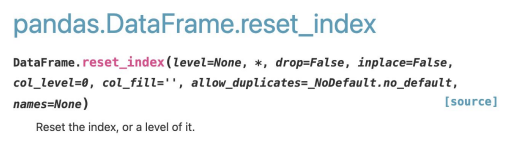
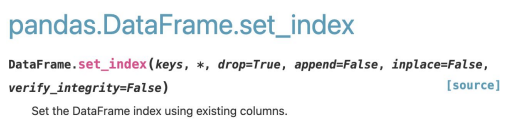

In [256]:
type(list['ABCDE'])

types.GenericAlias

In [251]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list['ABCDE'], np.round(np.random.rand(3, 5), 2)]).T, columns=["C1", "C2", "C3", "C4"])  # list[...] 와 list(...)의 차이를 떠올려보세요.
df1

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 5

In [252]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'), np.round(np.random.rand(3, 5), 2)]).T, columns=["C1", "C2", "C3", "C4"])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [258]:
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


마찬가지로 C2 column을 인덱스로 지정하면 기존의 인덱스는 사라집니다.

In [259]:
df2.set_index("C2")

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


In [260]:
df2.reset_index()

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [261]:
df2.reset_index(drop=True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


#### 연습 문제
5명의 학생의 국어, 영어, 수학 점수를 나타내는 DataFrame을 다음과 같이 만듭니다.  
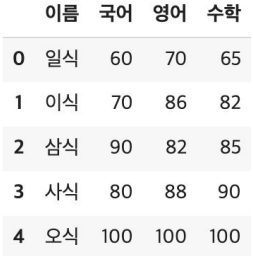  
(1) “이름” column을 인덱스로 만들어보세요.  
(2) (1)에서 인덱스로 만든 “이름”을 다시 column으로 복원하세요.

In [262]:
score = {
    "이름":["일식", "이식", "삼식", "사식", "오식"],
    "국어":[60, 70, 90, 80, 100],
    "영어":[70, 86, 82, 88, 100],
    "수학":[65, 82, 85, 90, 100]
}

In [263]:
score = pd.DataFrame(score)
score.set_index("이름",inplace=True)
score

,국어,영어,수학
이름,,,
일식,60,70,65
이식,70,86,82
삼식,90,82,85
사식,80,88,90
오식,100,100,100


In [264]:
score.reset_index(inplace=True)
score

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


### DataFrame 다중 인덱스

In [265]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                    columns=[["A", "A", "B", "B"],
                             ["C1", "C2", "C3", "C4"]])
df3

A           B      
     C1    C2    C3    C4
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [267]:
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C3    C4
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [268]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                    columns=[["A", "A", "B", "B"],
                             ["C1", "C2", "C3", "C4"]],
                      index=[["M", "M", "M", "F", "F", "F"],
                             ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

### DataFrame row index와 column index 교환


In [269]:
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [270]:
df4.stack()

Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C1     1.76   NaN
            C2     0.40   NaN
            C3      NaN  0.98
            C4      NaN  2.24
      id_2  C1     1.87   NaN
            C2    -0.98   NaN
            C3      NaN  0.95
            C4      NaN -0.15
      id_3  C1    -0.10   NaN
            C2     0.41   NaN
            C3      NaN  0.14
            C4      NaN  1.45
F     id_1  C1     0.76   NaN
            C2     0.12   NaN
            C3      NaN  0.44
            C4      NaN  0.33
      id_2  C1     1.49   NaN
            C2    -0.21   NaN
            C3      NaN  0.31
            C4      NaN -0.85
      id_3  C1    -2.55   NaN
            C2     0.65   NaN
            C3      NaN  0.86
            C4      NaN -0.74

In [271]:
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [272]:
df4.unstack()

Cidx1     A                                   B                              
Cidx2    C1                C2                C3                C4            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

인덱스를 지정할 때는 문자열 이름과 순서를 표시하는 숫자 인덱스를 모두 사용할 수 있습니다.  

### DataFrame 다중 인덱스가 있는 경우의 인덱싱


In [277]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C3    C4
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [279]:
df3[("B", "C3")]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C3), dtype: float64

loc 인덱서를 사용하는 경우에도 마찬가지로 튜플을 사용해서 인덱싱해야 합니다.

In [280]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C3    C4
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [283]:
df3.loc[0, ("B", "C3")]

0.98

In [284]:
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A           B             
Cidx2    C1    C2    C3    C4     C1
0      1.76  0.40  0.98  2.24  100.0
1      1.87 -0.98  0.95 -0.15    NaN
2     -0.10  0.41  0.14  1.45    NaN
3      0.76  0.12  0.44  0.33    NaN
4      1.49 -0.21  0.31 -0.85    NaN

In [285]:
df3.loc[0, ("B", "C3")] = 100
df3

Cidx1     A             B             
Cidx2    C1    C2      C3    C4     C1
0      1.76  0.40  100.00  2.24  100.0
1      1.87 -0.98    0.95 -0.15    NaN
2     -0.10  0.41    0.14  1.45    NaN
3      0.76  0.12    0.44  0.33    NaN
4      1.49 -0.21    0.31 -0.85    NaN

단, iloc 인덱서를 사용하는 경우에는 튜플 형태의 다중인덱스를 사용할 수 없습니다.

In [286]:
df3

Cidx1     A             B             
Cidx2    C1    C2      C3    C4     C1
0      1.76  0.40  100.00  2.24  100.0
1      1.87 -0.98    0.95 -0.15    NaN
2     -0.10  0.41    0.14  1.45    NaN
3      0.76  0.12    0.44  0.33    NaN
4      1.49 -0.21    0.31 -0.85    NaN

In [287]:
df3.iloc[0, 2]

100.0

만약 하나의 레벨 값만 넣으면 다중 인덱스 중에서 가장 상위의 값을 지정한 것으로 반환합니다.

In [288]:
df3

Cidx1     A             B             
Cidx2    C1    C2      C3    C4     C1
0      1.76  0.40  100.00  2.24  100.0
1      1.87 -0.98    0.95 -0.15    NaN
2     -0.10  0.41    0.14  1.45    NaN
3      0.76  0.12    0.44  0.33    NaN
4      1.49 -0.21    0.31 -0.85    NaN

In [289]:
df3["A"]

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


df4 DataFrame은 다음과 같이 인덱싱할 수 있습니다.

In [290]:
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [291]:
df4.loc[("M", "id_1"), ("A", "C1")]

1.76

In [293]:
df4.loc[:, ("A", "C1")]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C1), dtype: float64

In [294]:
df4.loc[("M", "id_1"), :]

Cidx1  Cidx2
A      C1       1.76
       C2       0.40
B      C3       0.98
       C4       2.24
Name: (M, id_1), dtype: float64

In [295]:
df4.loc[("All", "All"), :] = df4.sum()
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

loc를 사용하는 경우에도 튜플이 아닌 하나의 값만 쓰면 가장 상위의 인덱스를 지정한 것과 같습니다. 

In [296]:
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [297]:
df4.loc["M"]

Cidx1     A           B      
Cidx2    C1    C2    C3    C4
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

특정 레벨의 모든 인덱스 값을 인덱싱할 때는 슬라이스를 사용합니다.  
다만 다중 인덱스의 튜플 내에서는 콜론(:), 즉 슬라이스 기호를 사용할 수 없고 대신 slice(None) 값을 사용해야 합니다.  

In [298]:
df4.loc[("M", slice(None)), :]

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

- loc 인덱싱 시에 콜론(:) 대신 slice(None)을 써야한다. 같은 것으로 판단한다.

In [299]:
df4.loc[(slice(None), "id_1"), :]

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

### DataFrame 다중 인덱스의 인덱스 순서 교환

In [302]:
df4

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [300]:
df6 = df4.swaplevel("Cidx1", "Cidx2", 1)
df6

Cidx2          C1    C2    C3    C4
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [301]:
df5 = df4.swaplevel("Ridx1", "Ridx2")
df5

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

### DataFrame 다중 인덱스가 있는 경우의 정렬


In [303]:
df5.sort_index(level=0)

Cidx1           A           B      
Cidx2          C1    C2    C3    C4
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id_2  F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id_3  F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [304]:
df6.sort_index(axis=1, level=0)

Cidx2          C1    C2    C3    C4
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

## DataFrame 합성

- merge, join

### DataFrame merge()


In [306]:
df1 = pd.DataFrame({
    "고객번호": [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    "이름": ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [307]:
df2 = pd.DataFrame({
    "고객번호": [1001, 1002, 1005, 1006, 1008, 1001],
    "금액": [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1002,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


- inner join

In [308]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,30000
2,1002,도우너,20000
3,1005,희동,15000
4,1006,마이콜,5000


outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여줍니다.

- outer join

In [309]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,30000.0
2,1002,도우너,20000.0
3,1003,또치,NaN
4,1004,길동,NaN
5,1005,희동,15000.0
6,1006,마이콜,5000.0
7,1007,영희,NaN
8,1008,NaN,100000.0


In [310]:
pd.merge(df2, df1, how='outer')

,고객번호,금액,이름
0,1001,10000.0,둘리
1,1001,30000.0,둘리
2,1002,20000.0,도우너
3,1005,15000.0,희동
4,1006,5000.0,마이콜
5,1008,100000.0,NaN
6,1003,NaN,또치
7,1004,NaN,길동
8,1007,NaN,영희


- 고유한 값만 가지는 , 중복되지 않는 column을 키(key)라고 합니다.

left는 첫 번째 인수 기준으로, right는 두번째 인수 기준으로 DataFrame의 키 값을 모두 보여줍니다.  

In [311]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,30000.0
2,1002,도우너,20000.0
3,1003,또치,NaN
4,1004,길동,NaN
5,1005,희동,15000.0
6,1006,마이콜,5000.0
7,1007,영희,NaN


In [312]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1002,도우너,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


만약 테이블에 키 값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서 조합을 만들어 냅니다.  

In [313]:
df1 = pd.DataFrame({
    "품종": ['setosa', 'setosa', 'virginica', 'virginica'],
    "꽃잎길이": [1.4, 1.3, 1.5, 1.3]},
    columns=["품종", "꽃잎길이"])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [315]:
df2 = pd.DataFrame({
    "품종": ['setosa', 'virginica', 'virginica', 'versicolor'],
    "꽃잎너비": [0.4, 0.3, 0.5, 0.3]},
    columns=["품종", "꽃잎너비"])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


이 데이터에서 키 값 setosa에 대해 위쪽 DataFrame는 1.4와 1.3라는 2개의 데이터,  
아래쪽 DataFrame에 0.4라는 1개의 데이터가 있으므로 병합된 데이터에는 setosa가 
(1.4, 0.4), (1.3, 0.4) 두 개의 데이터가 생깁니다.   
키 값 virginica의 경우에는 왼쪽DataFrame에 1.5와 1.3라는 2개의 데이터,  
오른쪽 DataFrame에 0.3와 0.5라는 2개의데이터가 있으므로 2개와 2개의 조합에 의해 4가지 값이 생깁니다.  

In [316]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


## DataFrame 시계열 자료 다루기 DatetimeIndex
시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말합니다. pandas에서 시계열 자료를   
생성하려면 인덱스를 DatetimeIndex 자료형으로 만들어야 합니다. DatetimeIndex는   
특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한   
인덱스입니다. 타임스탬프 인덱스의 label값이 반드시 일정한 간격일 필요는 없습니다.  
  
DatetimeIndex 인덱스는 다음과 같은 보조 함수를 사용하여 생성합니다.  
- pd.to_datetime 함수  
- pd.date_range 함수  

pd.to_datetime 함수를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성합니다.  

In [317]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

이렇게 만들어진 인덱스를 사용하여 Series나 DataFrame을 생성하면 됩니다.

In [318]:
np.random.seed(0)
s = pd.DataFrame(np.random.randn(4), index=idx)
s

,0
2018-01-01,1.764052
2018-01-04,0.400157
2018-01-05,0.978738
2018-01-06,2.240893


pd.date_range 함수를 쓰면 모든 날짜/시간을 일일이 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 줍니다.

In [319]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [320]:
pd.date_range(start="2018-4-1", periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

freq 인수로 특정한 날짜만 생성되도록 할 수도 있습니다. 많이 사용되는 freq 인수값은 다음과 같습니다.
- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날  
  
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [322]:
pd.date_range("2018-4-1", "2018-4-30", freq="B") # B는 주말이 아닌 평일을 가르킵니다.

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

In [323]:
pd.date_range("2018-4-1", "2018-4-30", freq="W") # W는 주말입니다.

DatetimeIndex(['2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [324]:
pd.date_range("2018-4-1", "2018-4-30", freq="W-MON") # W-MON은 월요일입니다.

DatetimeIndex(['2018-04-02', '2018-04-09', '2018-04-16', '2018-04-23',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [325]:
pd.date_range("2018-4-1", "2018-4-30", freq="MS") # MS은 각 달의 첫 날입니다.

DatetimeIndex(['2018-04-01'], dtype='datetime64[ns]', freq='MS')

In [326]:
pd.date_range("2018-4-1", "2018-4-30", freq="M") # M은 각 달의 마지막 날입니다.

DatetimeIndex(['2018-04-30'], dtype='datetime64[ns]', freq='M')

In [327]:
pd.date_range("2018-4-1", "2018-4-30", freq="BMS") # BMS은 주말이 아닌 평일 중에서 각 달의 첫 날입니다.

DatetimeIndex(['2018-04-02'], dtype='datetime64[ns]', freq='BMS')

In [328]:
pd.date_range("2018-4-1", "2018-4-30", freq="BM") # BM은 주말이 아닌 평일 중에서 각 달의 마지막 날입니다.

DatetimeIndex(['2018-04-30'], dtype='datetime64[ns]', freq='BM')

In [329]:
pd.date_range("2018-4-1", "2018-4-30", freq="WOM-2THU") # 각 달의 두번째 목요일입니다.

DatetimeIndex(['2018-04-12'], dtype='datetime64[ns]', freq='WOM-2THU')

시계열 데이터의 인덱스는 시간이나 날짜를 나타내기 때문에 날짜 이동 등의 다양한 연산이 가능합니다.  
예를 들어 shift 연산을 사용하면 인덱스는 그대로 두고 데이터만 이동할 수도 있습니다.  

In [330]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range("2018-1-1", periods=4, freq="M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [331]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [332]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [333]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [334]:
ts.shift(1, freq="W")

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

datetime 자료형 Series에는 dt 접근자가 있어 datetime 자료형이 가진 몇가지 유용한 속성과 메서드를 사용할 수 있습니다.

In [335]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

예를 들어 year, month, day, weekday 등의 속성을 이용하면 년, 월, 일, 요일 정보를 빼낼 수 있습니다. 

In [336]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [337]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

strftime 메서드를 이용하여 문자열을 만드는 것도 가능합니다.

In [343]:
s.dt.strftime("%Y년 %m월 %d일")

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

In [346]:
s.dt.strftime("%y년 %m월 %d일")

0     20년 12월 25일
1     20년 12월 26일
2     20년 12월 27일
3     20년 12월 28일
4     20년 12월 29일
         ...     
95    21년 03월 30일
96    21년 03월 31일
97    21년 04월 01일
98    21년 04월 02일
99    21년 04월 03일
Length: 100, dtype: object

## 1/25 퀴즈 3.

In [3]:
#문제 1`
import numpy as np
import pandas as pd

arr1 = np.arange(2, 21, 3)
arr1

array([ 2,  5,  8, 11, 14, 17, 20])

#### 문제 2
클래스 인스턴스 자체이다.

In [5]:
# 문제 3
float

float

In [6]:
# 문제 4
3

3

In [8]:
# 문제 5
sr1 = pd.Series({"일": 1,
                 "이": 2,
                 "삼": 3})
sr1

일    1
이    2
삼    3
dtype: int64

In [9]:
# 문제 6
2, 5

(2, 5)

In [ ]:
# 문제 7
1 # 아... 잘못 풀었다.
5 # -> 유니버셜.. 뭐시기

In [ ]:
# 문제 8
1, 3, 4, 5

In [ ]:
# 문제 9
3

In [ ]:
# 문제 10
5  # 1번 공부 더하기

### DataFrame 그룹 연산 메서드
데이터를 그룹화 하는 메서드로 unique 한 값들을 기준으로 처리합니다.

In [14]:
np.random.seed(0)
df2= pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [15]:
groups = df2.groupby(df2.key1) # key1 컬럼 데이터로 그룹화
groups

In [17]:
groups.groups # groupby 클래스 객체는 각 그룹 데이터의 인덱스를 갖고 있는 groups 속성이 있다.

{'A': [0, 1, 4], 'B': [2, 3]}

In [16]:
groups.sum() # 그룹 연산이 가능

,data1,data2
key1,,
A,8,80
B,7,70


In [18]:
# 할당하지 않고 그룹 연산을 이용 가능
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [19]:
# 또 다른 접근 방식
df2.groupby(df2.key1)["data1"].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [21]:
# 또 다른 접근 방식
df2.groupby(df2.key1).sum()["data1"]

key1
A    8
B    7
Name: data1, dtype: int64

In [22]:
# 또 다른 접근 방식
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [23]:
# 또 다른 접근 방식
df2.data1.groupby([df2.key2, df2.key1]).sum()

key2  key1
one   A       6
      B       3
two   A       2
      B       4
Name: data1, dtype: int64

#### 그룹 메서드 이용 예제

In [24]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [25]:
df1["인구"].groupby([df1["지역"], df1["연도"]]).sum().unstack("연도")

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


In [26]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### Tip
1. unique() 메서드를 이용해 유일한 값들을 얻을 수 있다.  
2. 데이터프레임에 describe() 메서드를 사용 가능하다.

#### 연습 문제

In [44]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.alive.unique()  # 유일한 값들로만 남겨준다.

array(['no', 'yes'], dtype=object)

In [45]:
def yn_to_bool(yn):
    if yn == "yes":
        yn = True       # return True
    else:
        yn = False      # return False
    return yn                # 리턴값을 주지 않아 오답을 겪었다.

In [46]:
titanic.alive = titanic.alive.apply(yn_to_bool)
titanic.alive

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: alive, Length: 891, dtype: bool

#### 연습 문제

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')
del titanic.loc[titanic["age"].isna()]
    
titanic["adult_female"] = titanic.apply(lambda x: True if x.age >= 20 and x.sex == "female" else False, axis=1)
titanic.adult_female

AttributeError: __delitem__

In [14]:
titanic.loc[titanic["age"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### dropna() 메서드 
이 메서드를 이용하면
- 결측값이 들어있는 행 전체 제거(delete row with missing values)
- 결측값이 들어있는 열 전체를 제거(delete column with missing values)
- 특정 행 또는 열 만을 대상으로 결측값이 들어있으면 제거(delete specific row or column with missing values)  

가 가능합니다.

#### 연습 문제

In [16]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic[titanic['age'].notnull()]
titanic['adult_female'] = titanic.apply(lambda x : True if x.age>=20 and x.sex =='female' else False, axis = 1)
titanic['adult_female']

0      False
1       True
2       True
3       True
4      False
       ...  
885     True
886    False
887    False
889    False
890    False
Name: adult_female, Length: 714, dtype: bool

In [18]:
titanic.to_csv("titanic_age.csv", index=False)

In [19]:
pd.read_csv("titanic_age.csv")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True
710,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False
711,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False
712,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False


#### 연습 문제

In [48]:
titanic = sns.load_dataset('titanic')
titanic_survive_pc = titanic['survived'].groupby(titanic['pclass'])
titanic_survive_pc

In [49]:
titanic_survive_pc.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [54]:
titanic_survive_pc.value_counts()  # pclass 별 total과 survived를 bool값들로 갱신해서 sum 한 값을 이용해서 비율을 구할 수 있지 않을까? 

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [32]:
titanic = sns.load_dataset('titanic')
titanic_gr_pclass = titanic.groupby(titanic['pclass'])
titanic_gr_pclass

In [35]:
titanic_gr_pclass.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [40]:
titanic_gr_pclass.value_counts()

MemoryError: Unable to allocate 54.2 GiB for an array with shape (58208274432,) and data type int8

In [26]:
titanic_survive_in_pc1_total = titanic_survive_in_pc[titanic_survive_in_pc[0]].sum()

AbstractMethodError: This method must be defined in the concrete class SeriesGroupBy

In [41]:
# 다른 풀이
titanic[['pclass', 'survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [43]:
groups = titanic.groupby(['pclass'])

In [44]:
groups.mean()

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


#### 연습 문제

In [53]:
titanic_sex = titanic.groupby('sex')
titanic_sex['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64